<img src="https://raw.githubusercontent.com/paular143/images_notebooks/master/logo-sin-nombre.png" alt="Universidad de Los Andes" style="width: 90px;" align="left" frameborder="300"/>

**UNIVERSIDAD DE LOS ANDES** <br>
**FACULTAD DE ECONOMÍA - EDUCACIÓN CONTINUADA** <br>
**Análisis espacial de datos y sus aplicaciones en Python 2021** <br>
**PROFESORES:** Germán González <br><br>


# Autocorrelación Espacial y Agrupación

- Estadística espacial. 
- Autocorrelación espacial global y local.
- Agrupación: puntos calientes y puntos fríos.
- Aplicación: Prevalencia de enfermedades.

Material de apoyo: https://volaya.github.io/libro-sig/chapters/Estadistica_espacial.html

In [1]:
# !pip install esda
# !pip install libpysal
# !pip istall tabulate

# Importamos los paquetes
import pandas as pd # Manejo de bases de datos
import geopandas as gpd # Manejo de bases de datos geográficas
import numpy as np # Funciones numéricas
import matplotlib.pyplot as plt # Gráficas
import seaborn as sns # Gráficas

import esda # Exploratory Spatial Data Analysis
import libpysal as lps # Librería de python para análisis espacial
from tabulate import tabulate

/Users/germangonzalez/.pyenv/versions/3.7.5/envs/motus/lib/python3.7/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


#### Preparemos los datos: casos de covid por municipio en Colombia controlando por población

In [2]:
# Cargamos el shape de los municipios del país
mpios = gpd.read_file('data/shape_mpios/MGN_MPIO_POLITICO.shp', encoding='utf-8') # encoding utf-8 para leer correctamente las tildes y ñ

In [3]:
# Exploramos
mpios.head()

,OBJECTID,DPTO_CCDGO,MPIO_CCDGO,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_NANO,DPTO_CNMBR,Shape_Leng,Shape_Area,geometry
0,1,25,25483,NARIÑO,1899,55.162627,2017,CUNDINAMARCA,0.521912,0.004494,"POLYGON ((-74.74130 4.47294, -74.74124 4.47271..."
1,2,25,25513,PACHO,1604,402.626777,2017,CUNDINAMARCA,1.202163,0.032840,"POLYGON ((-74.21183 5.29443, -74.21167 5.29418..."
2,3,25,25506,VENECIA,Decreto 727 Septiembre 5 de 1951,122.203317,2017,CUNDINAMARCA,0.487368,0.009952,"POLYGON ((-74.44812 4.11888, -74.44777 4.11779..."
3,4,25,25491,NOCAIMA,1735,68.938233,2017,CUNDINAMARCA,0.398799,0.005622,"POLYGON ((-74.39011 5.11002, -74.39010 5.10997..."
4,5,25,25489,NIMAIMA,Ordenanza 30 de Julio de 1904,59.499825,2017,CUNDINAMARCA,0.499052,0.004853,"POLYGON ((-74.34091 5.20132, -74.34041 5.20075..."


<AxesSubplot:>

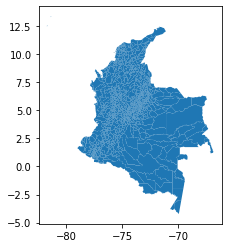

In [4]:
# Graficamos rápidamente
mpios.plot()

In [5]:
# Datos de casos confirmados de Covid 19 a 1 de Julio de 2020
covid = pd.read_csv('Data/Covid19.csv')

/Users/germangonzalez/.pyenv/versions/3.7.5/envs/motus/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3170: DtypeWarning: Columns (10,12,14,16,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# Exploramos
covid.head()

,ID de caso,Fecha de notificación,Código DIVIPOLA,Ciudad de ubicación,Departamento o Distrito,atención,Edad,Sexo,Tipo,Estado,...,FIS,Fecha de muerte,Fecha diagnostico,Fecha recuperado,fecha reporte web,Tipo recuperación,Codigo departamento,Codigo pais,Pertenencia etnica,Nombre grupo etnico
0,1,2020-03-02T00:00:00.000,11001,Bogotá D.C.,Bogotá D.C.,Recuperado,19,F,Importado,Leve,...,2020-02-27T00:00:00.000,NaN,2020-03-06T00:00:00.000,2020-03-13T00:00:00.000,2020-03-06T00:00:00.000,PCR,11,380.0,Otro,NaN
1,2,2020-03-06T00:00:00.000,76111,Guadalajara de Buga,Valle del Cauca,Recuperado,34,M,Importado,Leve,...,2020-03-04T00:00:00.000,NaN,2020-03-09T00:00:00.000,2020-03-19T00:00:00.000,2020-03-09T00:00:00.000,PCR,76,724.0,Otro,NaN
2,3,2020-03-07T00:00:00.000,5001,Medellín,Antioquia,Recuperado,50,F,Importado,Leve,...,2020-02-29T00:00:00.000,NaN,2020-03-09T00:00:00.000,2020-03-15T00:00:00.000,2020-03-09T00:00:00.000,PCR,5,724.0,Otro,NaN
3,4,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,55,M,Relacionado,Leve,...,2020-03-06T00:00:00.000,NaN,2020-03-11T00:00:00.000,2020-03-26T00:00:00.000,2020-03-11T00:00:00.000,PCR,5,NaN,Otro,NaN
4,5,2020-03-09T00:00:00.000,5001,Medellín,Antioquia,Recuperado,25,M,Relacionado,Leve,...,2020-03-08T00:00:00.000,NaN,2020-03-11T00:00:00.000,2020-03-23T00:00:00.000,2020-03-11T00:00:00.000,PCR,5,NaN,Otro,NaN


In [7]:
covid['Código DIVIPOLA'].astype(str)

0         11001
1         76111
2          5001
3          5001
4          5001
          ...  
102004    11001
102005    11001
102006    11001
102007    11001
102008    11001
Name: Código DIVIPOLA, Length: 102009, dtype: object

In [8]:
# El código divipola de los municipios se leyeron como número
covid['Código DIVIPOLA'] = covid['Código DIVIPOLA'].astype(str) # Los convertimos a tipo string (caracteres)
covid['Código DIVIPOLA'] = covid['Código DIVIPOLA'].str.rjust(5, '0') # Los ponemos en el formato que es: 5 caracteres y en caso de ser menos poner '0's al principio.

In [9]:
# Contamos el número de casos por departamento (.size())
# .reset_index() lo usamos para convertir el resultado en un pandas DataFrame indicandole el nombre de la columna que creamos (del número de registros de covid)
covid_mpios = covid.groupby('Código DIVIPOLA').size().reset_index(name = 'num_covid')

In [10]:
# Exploramos el resultado
covid_mpios

,Código DIVIPOLA,num_covid
0,05001,2198
1,05030,5
2,05034,1
3,05038,1
4,05042,7
...,...,...
659,95001,39
660,97001,11
661,97666,1
662,97889,16


In [11]:
# Pegamos las dos bases: para cada MPIO_CCDGO de la base mpio, buscamos el código en la columna Código DIVIPOLA de la base covid_mpios.
# Con how = 'left' conservamos todos los municipios de la base mpios
covid_mpios = mpios.merge(covid_mpios, left_on = 'MPIO_CCDGO', right_on = 'Código DIVIPOLA', how = 'left')

In [12]:
# Cambiamos los NA (municipios que no estaban en la base de covid) por 0
covid_mpios.fillna({'num_covid':0}, inplace=True)

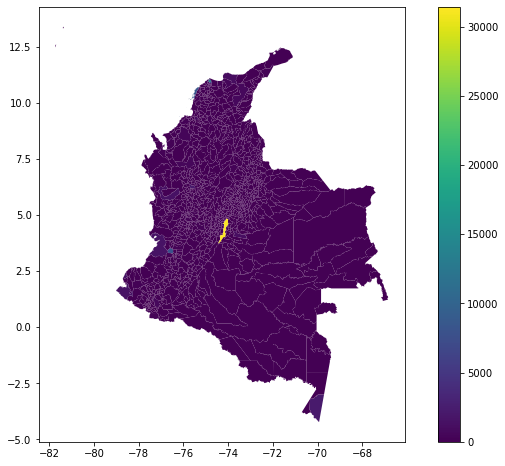

In [13]:
# Graficamos los resultados en un mapa coroplético: el color de cada polígono corresponde al número de casos de covid.
covid_mpios.plot(column = 'num_covid', figsize = (12,8), legend = True);

In [14]:
# Ahora cargamos la base de proyecciones de población del DANE
poblacion = pd.read_excel('data/poblacion-dane.xls', sheet_name='Municipios') # con sheet_name indicamos el nombre de la hoja del excel que queremos cargar

In [15]:
# Exploramos
poblacion

,Departamento,Nombre Departamento,Municipio,Nombre Municipio,Total 2018,Total 2019,Total 2020
0,5,Antioquia,5001,Medellín,2427129,2483545,2533424
1,5,Antioquia,5002,Abejorral,20367,20258,20287
2,5,Antioquia,5004,Abriaquí,2695,2710,2735
3,5,Antioquia,5021,Alejandría,4657,4669,4698
4,5,Antioquia,5030,Amagá,30227,30777,31283
...,...,...,...,...,...,...,...
1117,97,Vaupés,97889,Yavaraté,1048,1067,1097
1118,99,Vichada,99001,Puerto Carreño,20936,20474,20294
1119,99,Vichada,99524,La Primavera,10122,9799,9608
1120,99,Vichada,99624,Santa Rosalía,4059,4130,4193


In [16]:
# Pasamos la columna de municipio a string y en el formato correcto: 5 caracteres con 0 al inicio.
poblacion['Municipio'] = poblacion['Municipio'].astype(str)
poblacion['Municipio'] = poblacion['Municipio'].str.rjust(5, '0')

In [17]:
# Pegamos la información de la población a la base construida antes: a cada municipio con su número de casos ahora le pegamos su población
covid_mpios = covid_mpios.merge(poblacion, left_on = 'MPIO_CCDGO', right_on = 'Municipio')

In [18]:
# Construimos la columna de prevalencia de la enfermedad: casos divido población (*100 para leer como porcentaje de población del municipio con la enfermedad)
covid_mpios['p_covid'] = covid_mpios['num_covid']/covid_mpios['Total 2020']*100

In [19]:
covid_mpios['p_covid']

0       0.040584
1       0.096888
2       0.044954
3       0.015239
4       0.000000
          ...   
1117    0.010191
1118    0.152373
1119    0.001070
1120    0.000000
1121    0.045866
Name: p_covid, Length: 1122, dtype: float64

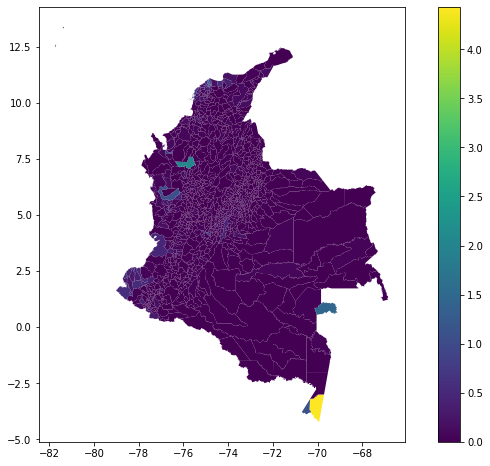

In [20]:
# Mapa coroplético de prevalencia municipal de covid en Colombia.
covid_mpios.plot(column = 'p_covid', figsize = (12,8), legend = True);

/Users/germangonzalez/.pyenv/versions/3.7.5/envs/motus/lib/python3.7/site-packages/mapclassify/classifiers.py:235: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/Users/germangonzalez/.pyenv/versions/3.7.5/envs/motus/lib/python3.7/site-packages/mapclassify/classifiers.py:237: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


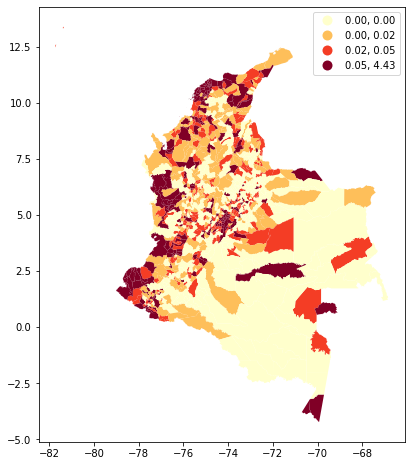

In [21]:
# Graficamos los resultados ahora por quantiles
covid_mpios.plot(column='p_covid', scheme='quantiles', 
                 cmap='YlOrRd', figsize = (12,8), legend=True);

## Autocorrelación

## Similaridad espacial de atributos

#### Primero se debe construir la matriz de pesos espaciales W. Para esto hay diferentes alternativas:
Binarios: 
- Contiguidad de Queen (reina).
- Contiguidad de Rook (torre).
- Contiguidad de Bishop (alfil).
- Vecinos más cercanos.
- Distancia máxima.

Continuos:
- Funciones Kernel con distancia euclideana o haversine.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTp8EqUdS_py28mo_Xtz4C-IHyPwsaBLkrDqw&usqp=CAU"/>

In [22]:
# Creamos la matriz de pesos espaciales con contiguidad queen con nuestra base de municipios
qW = lps.weights.Queen.from_dataframe(covid_mpios)

/Users/germangonzalez/.pyenv/versions/3.7.5/envs/motus/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There are 2 islands with ids: 287, 288.
  warnings.warn(message)


In [23]:
# Transformamos haciendo que todas las filas sumen uno.
# Esto es equivalente a dividir cada fila por el número de vecinos de cada municipio.
qW.transform = 'r'

('WARNING: ', 287, ' is an island (no neighbors)')
('WARNING: ', 288, ' is an island (no neighbors)')


In [24]:
len(covid_mpios)

1122

#### Con esta matriz de pesos espaciales podemos obtener el lag espacial del atributo que queremos estudiar

$Lag \text{ } Espacial  = \sum_{j}w_{j}x_j$

$Lag \text{ } Espacial  = \dfrac{\sum_{vecinos}prevalencia}{\# vecinos}$

In [25]:
# Creamos el lag espacial de la prevalencia de covid por municipio.
# Esto es, le asignamos a cada municipio el promedio de la prevalencia de covid de sus municipios vecinos.
covid_lag = lps.weights.lag_spatial(qW, covid_mpios['p_covid'])

In [26]:
covid_lag

array([0.02817245, 0.02922399, 0.00493876, ..., 0.07006904, 0.0176116 ,
       0.00425271])

In [27]:
# Extraemos la columna de prevalencia de covid por municipio
covid = covid_mpios['p_covid']

In [28]:
covid_lag[0:5]

array([0.02817245, 0.02922399, 0.00493876, 0.02247987, 0.01549091])

In [29]:
covid[0:5]

0    0.040584
1    0.096888
2    0.044954
3    0.015239
4    0.000000
Name: p_covid, dtype: float64

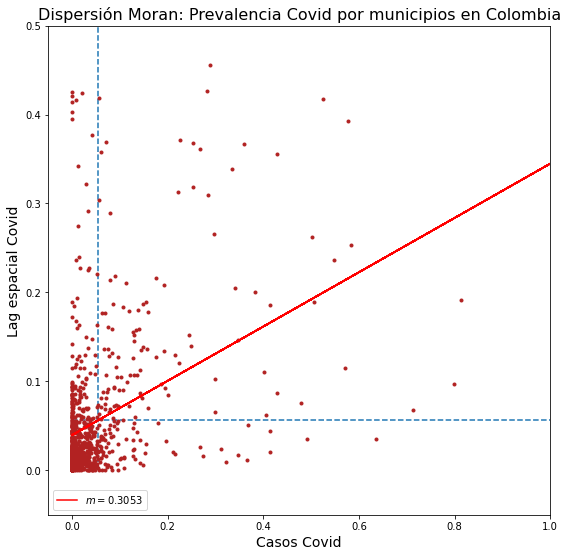

In [30]:
# Vamos a graficar la prevalencia de covid de cada municipio y la prevalencia promedio de sus vecinos (lag espacial)
fig, ax = plt.subplots(1, figsize=(9, 9)) # Creamos la figura
plt.plot(covid, covid_lag, '.', color='firebrick') # Creamos el gráfico de dispersión
# Cada punto es un municipio ubicado en su valor de prevalencia y de su lag espacial de prevalencia (promedio de prevalencia de sus vecinos)

#Promedio de prevalencia de covid por municipio
plt.vlines(covid.mean(), covid_lag.min(), 
           covid_lag.max(), linestyle='--')
#Promedio de lag espacial prevalencia covid
plt.hlines(covid_lag.mean(), covid.min(), 
           covid.max(), linestyle='--')

#Ajustamos una regresión lineal a estos datos
b,a = np.polyfit(covid, covid_lag, 1)
plt.plot(covid, a + b*covid, 'r', label = '$m = {:.4f}$'.format(b)) # Graficamos la regresión lineal
# La pendiente de la regresión es la correlación entre la prevalencia y el lag espacial de la prevalencia

plt.title('Dispersión Moran: Prevalencia Covid por municipios en Colombia', fontsize = 16) # Título
plt.ylabel('Lag espacial Covid', fontsize = 14) # Título eje y
plt.xlabel('Casos Covid', fontsize = 14) # Titulo eje x
plt.xlim(-0.05, 1) #Zoom en valores de eje x
plt.ylim(-0.05, 0.5) # Zoom a valores en eje y
plt.legend(); # Leyenda de la gráfica

#### **Objetivo**: Qué tanto se relaciona el atributo de un lugar con respecto al atributo de sus vecinos

#### Queremos estudiar qué tan parecidos son los casos de covid (o de cierta variable de interés) para municipios cercanos. Esto se hace comparando la matriz de pesos espaciales con la información del atributo que queremos analizar.

#### La interdependencia de los atributos de un lugar y su ubicación geográfica se conoce como autocorrelación espacial global, y puede ser de tres tipos:
- **Positiva**: Lugares cercanos espacialmente tienen a su vez valores similares de sus características. En este caso se pueden identificar puntos calientes y puntos fríos de concentración de eventos. Esto ocurre en fenómenos o atributos contagiosos o desencadentantes de un lugar a otro.
- **Negativa**: Lugares cercanos espacialmente tienen a su vez valores diferentes de sus atributos. Esto ocurre en fenómenos atrayantes o repelentes entre lugares.
- **No hay**: La cercanía espacial entre dos lugares no afecta la relación entre los valores de las características entre los lguares 

## Índice Gamma 
El índice Gamma justo compara estas dos matrices con el siguiente estimador:

$\Gamma = \sum_{i}w_{ij}a_{ij}$

Para el cual hay múltiples formas de definir $a$, el cual captura qué tanto se parecen los valores del atributo (prevalencia de covid) de dos municipios.

##### El índice Gamma se computa con la función esda.Gamma indicando el atributo que se quiere evaluar y la matriz de pesos espaciales. Las diferentes definiciones de $a$ se especifican con los argumentos _operation_ (operación entre los atributos, producto (c), cuadrado (s), resta (a)) y _standarize_ (estandarización dividiendo por la varianza/desviación, True o False)

$a_{ij} = x_{i}x_{j}$

In [31]:
g = esda.Gamma(covid_mpios['p_covid'], qW)

In [32]:
print(g.g)
print(g.p_sim_g)

16.723093782235527
0.001


$a_{ij} = \dfrac{(x_{i}-\bar{x})(x_{j}-\bar{x})}{var(x)}$

In [33]:
g = esda.Gamma(covid_mpios['p_covid'], qW, standardize=True)
print(g.g)
print(g.p_sim_g)

342.45911425986753
0.001


$a_{ij}=(x_{i}-x_{j})^2$

In [34]:
g = esda.Gamma(covid_mpios['p_covid'], qW, operation='s')
print(g.g)
print(g.p_sim_g)

58.47442538977535
0.002


$a_{ij}=\dfrac{(x_{i}-x_{j})^2}{var(x)}$

In [35]:
g = esda.Gamma(covid_mpios['p_covid'], qW, operation='s', standardize=True)
print(g.g)
print(g.p_sim_g)

1515.6088476579137
0.004


$a_{ij}=|x_{i}-x_{j}|$

In [36]:
g = esda.Gamma(covid_mpios['p_covid'], qW, operation='a')
print(g.g)
print(g.p_sim_g)

73.94791641339997
0.001


$a_{ij}=\dfrac{|x_{i}-x_{j}|}{std(x)}$

In [37]:
g = esda.Gamma(covid_mpios['p_covid'], qW, operation='a', standardize=True)
print(g.g)
print(g.p_sim_g)

376.4753330629811
0.001


#### Más que el valor del índice Gamma es importante identificar si si existe autocorrelación espacial global (positiva o negativa) estadísticamente singificativa. La hay cuando el p-valor (p_sim_g) es menor que 0.05 (o menor que 0.1, aunque entre más cercano a cero mejor).

## Índice $I$ de Moran

$I = \dfrac{N}{W}\dfrac{\sum_i \sum_j w_{ij}(x_i-\bar{x})(x_j-\bar{x})}{\sum_i (x_i-\bar{x})^2}$

$W = \sum_i\sum_jw_{ij}$

Usando contiguidad normalizada (suma de filas = 1):

$I = \dfrac{\sum_i (x_i-\bar{x})(\sum_j w_{ij}x_j-\bar{x})}{\sum_i (x_i-\bar{x})^2}$

#### Valores positivos indican autocorrelación espacial positiva (mayor si cerca a 1), negativos autocorrelación espacial negativa (mayor si cerca a -1) y cercanos a 0 no autocorrelación espacial.

In [38]:
# El índice I de Moran se computa con la función esda.Moran
# indicando el atributo que se quiere evaluar y la matriz de pesos espaciales.
I_prevalencia = esda.Moran(covid_mpios['p_covid'], qW)

In [39]:
# Estamos comparando la prevalencia espacial de covid por municipio
covid_mpios['p_covid']

0       0.040584
1       0.096888
2       0.044954
3       0.015239
4       0.000000
          ...   
1117    0.010191
1118    0.152373
1119    0.001070
1120    0.000000
1121    0.045866
Name: p_covid, Length: 1122, dtype: float64

<AxesSubplot:>

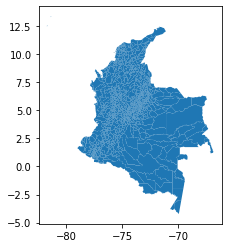

In [40]:
# Con la cercanía espacial entre los municipios
covid_mpios.plot()

In [41]:
# Con tabulate podemos imprimir los resultados de manera ordenada.
print(tabulate([['I de Moran:', I_prevalencia.I],
               ['Valor esperado I:', I_prevalencia.EI],
               ['p-valor:', I_prevalencia.p_norm]]))

-----------------  ------------
I de Moran:         0.305767
Valor esperado I:  -0.000892061
p-valor:            0
-----------------  ------------


#### Como antes, es crucial examinar si el resultado es estadísticamente significativo. Es decir, verificar si efectivamente existe autocorrelación espacial en los datos o si es pura suerte. Esto se puede comprobar usando las propiedades asintóticas del estimador (se distribuye de manera normal) o simulaciones de Montecarlo.

#### Las simulaciones de Montecarlo consisten en asignar de manera aleatoria los atributos a las diferentes geometrías (algo así como revolver el mapa) y calcular nuevamente el índice I de Moran para los datos permutados (revueltos). Si efectivamente existe autocorrelación espacial estadísticamente significativa, el índice I de Moran resultante de cada simulación debe ser diferente al valor real encontrado con los datos originales (y en general las simulaciones deben estar más cercanas a cero).

In [42]:
I_prevalencia.sim[:100]

array([-0.00771952,  0.00099387, -0.00139344, -0.00798596,  0.00269439,
       -0.00138931, -0.01820584, -0.01540216,  0.0184488 ,  0.01404374,
       -0.01470753, -0.01932417, -0.01657684,  0.00180382,  0.00483028,
       -0.00840378, -0.00423678,  0.00127175, -0.00433434, -0.00741612,
       -0.00977458,  0.02654771,  0.00135005, -0.01749435, -0.01255234,
       -0.00254799, -0.01853371, -0.01749922, -0.01275306,  0.00626564,
       -0.00601303, -0.00045308, -0.00393241,  0.03558416,  0.00466491,
        0.03567615, -0.01865321,  0.02592221, -0.01304562, -0.00135168,
       -0.01662736, -0.01132323, -0.01051509,  0.02022011, -0.00853979,
       -0.00388512, -0.00058018, -0.00366856, -0.00989089, -0.01179795,
       -0.02053131, -0.00783107, -0.01051613, -0.02379526, -0.00235761,
        0.00852811, -0.00760503, -0.0214274 ,  0.0117138 ,  0.02354671,
        0.01089231, -0.01831349, -0.00481037, -0.00196091,  0.01658054,
        0.03390362, -0.00141535,  0.01025181, -0.02134135, -0.00

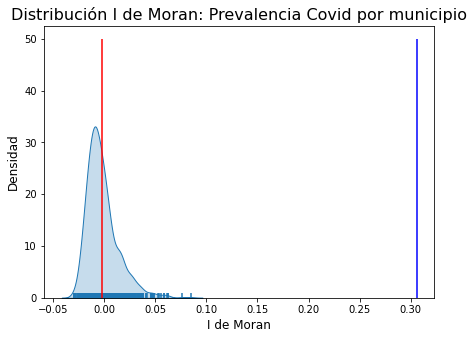

In [43]:
# Vamos a graficar las diferentes simulaciones y el índice I de Morán de los datos reales.
fig, ax = plt.subplots(1, figsize=(7,5)) # Creamos la figura
sns.kdeplot(I_prevalencia.sim, shade=True, ax=ax) # Graficamos la distribución de los I de Moran simulados (con sns.kdeplot, estimación de densidad de kernel)
plt.vlines(I_prevalencia.sim, 0, 1) # Graficamos pequeñas líneas negras para los distintos I simulados.
plt.vlines(I_prevalencia.EI_sim, 0, 50, 'r') # En rojo el promedio de Moran simulado
plt.vlines(I_prevalencia.I, 0, 50, 'b') # Graficamos en azul el Moran real
plt.title('Distribución I de Moran: Prevalencia Covid por municipio', fontsize = 16) # Título
plt.xlabel('I de Moran', fontsize = 12) # Titulo eje x
plt.ylabel('Densidad', fontsize = 12); # Título eje y

#### Nuevamente, lo que se desea es que el valor real (línea azul) no intersecte o caiga en el área sombreada azul de la distribución de los Moran simulados. La probabilidad de que el valor real haya sido resultado de una de las simulaciones es el p-valor que imprimimos antes (.p_norm/.p_sim) y entre más cercano a cero sea, mejor. En general, si el p-valor es menor a 0.05 se concluye que la correlación es estadísticamente significativa.

### Con este análisis podemos concluir que existe correlación espacial global positiva estadísticamente significativa de la prevalencia de covid a nivel municipal en el país.

## Índice $C$ de Geary

$C = \dfrac{N-1}{2W}\dfrac{\sum_i \sum_j w_{ij}(x_i-x_j)^2}{\sum_i (x_i-\bar{x})^2}$

#### Valores menores que 1 indican autocorrelación espacial positiva, mayores que 1 autocorrelación espacial negativa y cercanos a 1 no autocorrelación espacial.

In [44]:
C_prevalencia = esda.Geary(covid_mpios['p_covid'], qW)

In [45]:
print(tabulate([['C de Geary:', C_prevalencia.C],
               ['Valor esperado C:', C_prevalencia.EC],
               ['p-valor:', C_prevalencia.p_norm]]))

-----------------  ----------
C de Geary:        0.676008
Valor esperado C:  1
p-valor:           1.8551e-60
-----------------  ----------


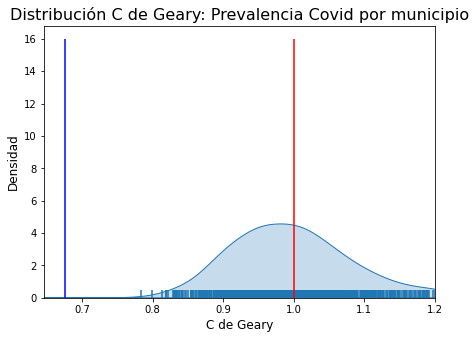

In [46]:
fig, ax = plt.subplots(1, figsize=(7,5))
sns.kdeplot(C_prevalencia.sim, shade=True, ax=ax)
plt.vlines(C_prevalencia.sim, 0, 0.5)
plt.vlines(C_prevalencia.C, 0, 16, 'b')
plt.vlines(C_prevalencia.EC_sim, 0, 16, 'r')
plt.xlim([C_prevalencia.C -0.03, 1.2])
plt.title('Distribución C de Geary: Prevalencia Covid por municipio', fontsize = 16)
plt.xlabel('C de Geary', fontsize = 12)
plt.ylabel('Densidad', fontsize = 12);

### Correlación espacial global positiva estadísticamente significativa

## Otros: índice $G$ de Getis y Ord

$G(d) = \dfrac{\sum_i\sum_j w_{ij}(d)x_{i}x_{j}}{\sum_i\sum_j x_{i}x_{j}}$ 

# Índice $I$ de Moran local (LISA)

Este índice se encarga de representar aquellas localizaciones con valores significativos en indicadores estadísticos de asociación espacial local, alertando así de la presencia de puntos calientes hot spots o atípicos espaciales, cuya intensidad depende de la significativa asociada de los datos estadísticos analizados.




$I_i = \dfrac{(x_i-\bar{x}) (\sum_j w_{ij}x_j-\bar{x})}{\sigma^2_x}$

In [47]:
# Matriz de contiguidad
qW = lps.weights.distance.Kernel.from_dataframe(covid_mpios, fixed=False, k=15)
qW.transform = 'r'

In [48]:
Ilocal_prevalencia = esda.Moran_Local(covid_mpios['p_covid'], qW)

In [49]:
Ilocal_prevalencia.Is

array([ 0.00148681, -0.01573148,  0.00858533, ...,  0.01049568,
        0.05480139,  0.00899983])

In [50]:
Ilocal_prevalencia.p_sim

array([0.386, 0.469, 0.258, ..., 0.378, 0.174, 0.239])

In [51]:
#### ----- Identificar significativos: P valor ------ ###### 
sigs = covid_mpios.loc[Ilocal_prevalencia.p_sim < 0.05, 'p_covid']

insigs = covid_mpios.loc[Ilocal_prevalencia.p_sim >= 0.05, 'p_covid']

In [52]:
### ------- Organizar los que son significativos por population covid ------ #####
covid_mpios.loc[Ilocal_prevalencia.p_sim < 0.05].sort_values('p_covid', ascending = False)

,OBJECTID,DPTO_CCDGO,MPIO_CCDGO,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_NANO,DPTO_CNMBR,Shape_Leng,Shape_Area,...,Código DIVIPOLA,num_covid,Departamento,Nombre Departamento,Municipio,Nombre Municipio,Total 2018,Total 2019,Total 2020,p_covid
1082,1083,91,91001,LETICIA,Decreto 352 de Feb 20 de 1964,6183.129180,2017,AMAZONAS,3.880001,0.500702,...,91001,2204.0,91,Amazonas,91001,Leticia,48144,48918,49737,4.431309
979,980,05,05361,ITUANGO,1857,2841.200561,2017,ANTIOQUIA,3.202014,0.232428,...,05361,572.0,5,Antioquia,05361,Ituango,27074,27419,27789,2.058368
1111,1112,97,97889,YAVARATÉ (Cor. Departamental),Decreto Nacional 1510 del 29 de Diciembre de 1914,4660.422307,2017,VAUPÉS,3.970046,0.376344,...,97889,16.0,97,Vaupés,97889,Yavaraté,1048,1067,1097,1.458523
1090,1091,91,91540,PUERTO NARIÑO,Decreto 106 de Enero 18 de 1984,1509.167342,2017,AMAZONAS,1.968859,0.122363,...,91540,115.0,91,Amazonas,91540,Puerto Nariño,9744,9997,10239,1.123157
1037,1038,27,27001,QUIBDÓ,Decreto ejecutivo de 30 de Marzo de 1825,3507.122810,2017,CHOCÓ,5.361054,0.285832,...,27001,1427.0,27,Chocó,27001,Quibdó,129237,130042,130825,1.090770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,463,68,68468,MOLAGAVITA,1709,180.471702,2017,SANTANDER,0.597493,0.014751,...,NaN,0.0,68,Santander,68468,Molagavita,4137,4105,4106,0.000000
463,464,68,68498,OCAMONTE,1899,75.221280,2017,SANTANDER,0.408743,0.006146,...,NaN,0.0,68,Santander,68498,Ocamonte,5661,5740,5810,0.000000
466,467,68,68522,PALMAR,1899,19.694442,2017,SANTANDER,0.270018,0.001610,...,NaN,0.0,68,Santander,68522,Palmar,1361,1386,1407,0.000000
468,469,68,68533,PÁRAMO,1768,72.981119,2017,SANTANDER,0.495257,0.005964,...,NaN,0.0,68,Santander,68533,Páramo,4654,4773,4869,0.000000


In [53]:
##### ----- Evaluar los covid lag ------ ###### 
lag_sigs = covid_lag[Ilocal_prevalencia.p_sim < 0.05]
lag_insigs = covid_lag[Ilocal_prevalencia.p_sim >= 0.05]

/Users/germangonzalez/.pyenv/versions/3.7.5/envs/motus/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  This is separate from the ipykernel package so we can avoid doing imports until


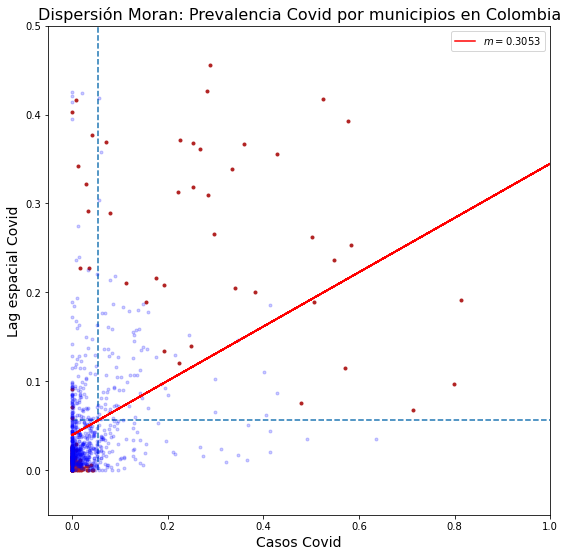

In [54]:
fig, ax = plt.subplots(1, figsize=(9, 9))
plt.plot(sigs, lag_sigs, '.', color='firebrick')
plt.plot(insigs, lag_insigs, '.k', alpha=.2,color='blue')

#Promedio csos
plt.vlines(covid.mean(), covid_lag.min(), 
           covid_lag.max(), linestyle='--')
#Promedio lag espacial prevalencia ERC
plt.hlines(covid_lag.mean(), covid.min(), 
           covid.max(), linestyle='--')

#Fit regresión lineal
b,a = np.polyfit(covid, covid_lag, 1)
plt.plot(covid, a + b*covid, 'r', label = '$m = {:.4f}$'.format(b))

plt.title('Dispersión Moran: Prevalencia Covid por municipios en Colombia', fontsize = 16)
plt.ylabel('Lag espacial Covid', fontsize = 14)
plt.xlabel('Casos Covid', fontsize = 14)
plt.xlim(-0.05, 1)
plt.ylim(-0.05, 0.5)
plt.legend();

In [55]:
covid_mpios.tail()

,OBJECTID,DPTO_CCDGO,MPIO_CCDGO,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_NANO,DPTO_CNMBR,Shape_Leng,Shape_Area,...,Código DIVIPOLA,num_covid,Departamento,Nombre Departamento,Municipio,Nombre Municipio,Total 2018,Total 2019,Total 2020,p_covid
1117,1118,20,20570,PUEBLO BELLO,ORD 37 DE DICIEMBRE 10 DE 1997,743.802046,2017,CESAR,1.860032,0.061418,...,20570,3.0,20,Cesar,20570,Pueblo Bello,27007,28298,29437,0.010191
1118,1119,44,44430,MAICAO,1956,1768.690007,2017,LA GUAJIRA,2.740399,0.146361,...,44430,282.0,44,La Guajira,44430,Maicao,170582,178832,185072,0.152373
1119,1120,44,44560,MANAURE,Ordenanza 15 de Noviembre 27 de 1973,1619.655275,2017,LA GUAJIRA,2.067048,0.134166,...,44560,1.0,44,La Guajira,44560,Manaure,83072,88881,93431,0.001070
1120,1121,50,50325,MAPIRIPÁN,Ordenanza 11 de Agosto 24 de 1989,11948.930742,2017,META,8.633181,0.970718,...,NaN,0.0,50,Meta,50325,Mapiripán,7007,7086,7156,0.000000
1121,1122,50,50568,PUERTO GAITÁN,Ordenanza 39 de Noviembre 29 de 1969,17247.686475,2017,META,7.795723,1.402166,...,50568,20.0,50,Meta,50568,Puerto Gaitán,41513,42677,43605,0.045866


In [56]:
Ilocal_prevalencia

In [57]:
#### ------ Identificar los que son significativos ------- ####### 
##### ------ Las ubicaciones con una autocorrelación local significativa, pero positiva ----- #### 
hotspots = (Ilocal_prevalencia.q == 1) & (Ilocal_prevalencia.p_sim < 0.05)
#### ------- El atributo por debajo de la media y el atributo laggeado (de sus vecinos) tambien------ ######
coldspots = (Ilocal_prevalencia.q == 3) & (Ilocal_prevalencia.p_sim < 0.05)
#### ------- Las ubicaciones con una autocorrelación local significativa, pero negativa ------ ######
doughnut = (Ilocal_prevalencia.q == 2) & (Ilocal_prevalencia.p_sim < 0.05)
#### ----- donde un valor alto está rodeado de valores bajos ----- #######
diamond = (Ilocal_prevalencia.q == 4) & (Ilocal_prevalencia.p_sim < 0.05)

In [58]:
from matplotlib import colors
hcmap = colors.ListedColormap(['white', 'red','lightblue'])
legend = ["No autocorrelación", "Puntos calientes", "Puntos fríos"]
covid_mpios['hotcold'] = [legend[(hotspots*1)[i] + (coldspots*2)[i]] for i in range(len(hotspots))]

Text(0.5, 1.0, 'Conglomerados prevalencia covid en Colombia')

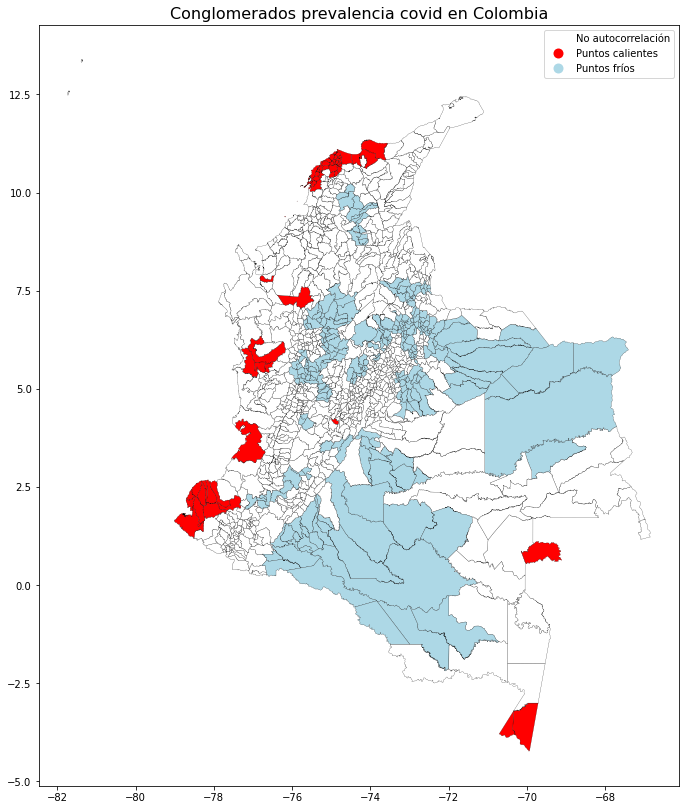

In [59]:
fig, ax = plt.subplots(1, figsize = (12,14))

covid_mpios.plot(ax = ax, column = 'hotcold', categorical = True, k = 2,
               cmap = hcmap, legend = True,
               edgecolor = 'k', linewidth = 0.2)

plt.title('Conglomerados prevalencia covid en Colombia', fontsize = 16)
#ax.axis('off');